In [1]:
pwd

'/Users/2021137/recommender_python/movielens'

In [2]:
import sys, os
sys.path.append(sys.path[0]+'/utils/')
os.chdir(os.path.dirname(os.getcwd())) # for test in jupyter notebook
from surprise import SVD
from surprise import NormalPredictor
from utils.Evaluator import Evaluator
from utils.MovieLens import MovieLens
import random
import numpy as np

def LoadMovieLensData():
    ml = MovieLens()
    print("Loading movie ratings...")
    data = ml.loadMovieLensLatestSmall()
    print("\nComputing movie popularity ranks so we can measure novelty later...")
    rankings = ml.getPopularityRanks()
    return (data, rankings)

np.random.seed(0)
random.seed(0)

# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadMovieLensData()

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

# Throw in an SVD recommender
SVDAlgorithm = SVD(random_state=10)
evaluator.AddAlgorithm(SVDAlgorithm, "SVD")

# Make random recommendations
Random = NormalPredictor()
evaluator.AddAlgorithm(Random, "Random")

# Evaluation
evaluator.Evaluate(True)

Loading movie ratings...
/Users/2021137

Computing movie popularity ranks so we can measure novelty later...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating  SVD ...
Evaluating accuracy...
Evaluating top-N with leave-one-out...
Computing hit-rate and rank metrics...
Computing recommendations with full data set...
Analyzing coverage, diversity, and novelty...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Analysis complete.
Evaluating  Random ...
Evaluating accuracy...
Evaluating top-N with leave-one-out...
Computing hit-rate and rank metrics...
Computing recommendations with full data set...
Analyzing coverage, diversity, and novelty...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Analysis complete.


Algorithm  RMSE       MAE        HR         cHR        ARHR       Coverage   Diversity  Novelty   
SVD        0.8779     0.6732     0.0361     0.0361     0.013

{'SVD': {'RMSE': 0.87790565300794,
  'MAE': 0.6731720779996845,
  'HR': 0.036065573770491806,
  'cHR': 0.036065573770491806,
  'ARHR': 0.013333333333333332,
  'Coverage': 0.9245901639344263,
  'Diversity': 0.03138572161157538,
  'Novelty': 504.3873857062885},
 'Random': {'RMSE': 1.4227093155167418,
  'MAE': 1.137519430141597,
  'HR': 0.018032786885245903,
  'cHR': 0.018032786885245903,
  'ARHR': 0.00900273224043716,
  'Coverage': 1.0,
  'Diversity': 0.05348741648832622,
  'Novelty': 843.9634426229508}}

In [5]:
result_dict = {'SVD': {'RMSE': 0.87790565300794,
  'MAE': 0.6731720779996845,
  'HR': 0.036065573770491806,
  'cHR': 0.036065573770491806,
  'ARHR': 0.013333333333333332,
  'Coverage': 0.9245901639344263,
  'Diversity': 0.03138572161157538,
  'Novelty': 504.3873857062885},
 'Random': {'RMSE': 1.4227093155167418,
  'MAE': 1.137519430141597,
  'HR': 0.018032786885245903,
  'cHR': 0.018032786885245903,
  'ARHR': 0.00900273224043716,
  'Coverage': 1.0,
  'Diversity': 0.05348741648832622,
  'Novelty': 843.9634426229508}}

In [6]:
import json
results_js = json.dumps(result_dict)

In [7]:
from datetime import datetime

In [10]:
exp_name = "exp_rand_svd"
date = datetime.today().strftime(format='%Y%M%d%H%m%s')
filename = './movielens/results/{}-{}.json'.format(exp_name, date)

with open(filename, 'w') as f:
     json.dump(result_dict, f)

In [1]:
import math
def computeYearSimilarity(movie1, movie2, years):
    diff = abs(years[movie1] - years[movie2])
    sim = math.exp(-diff / 10.0)
    return sim

In [2]:
math.exp(-10 /  10.0)

0.36787944117144233

In [3]:
math.exp(-5 /  10.0)

0.6065306597126334

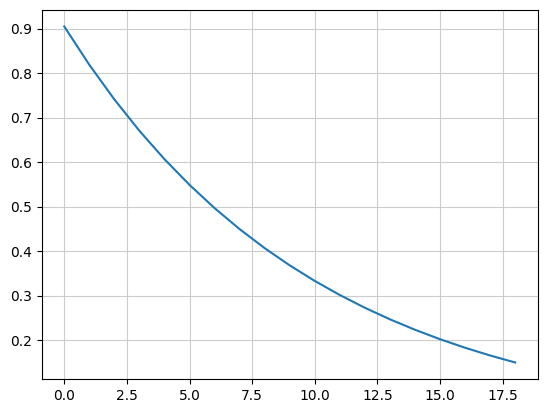

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터
X = list(range(1,20))   
y = []
for x in X:
    y.append(math.exp(-x / 10.0))   # y = 3x - 24
    
# 그래프
plt.plot(y)
plt.grid(color='0.8')
plt.show()